In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Import the dataset
df = pd.read_csv("Aquifer_Petrignano.csv")

df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


# Data preprocessing

## Dropping unwanted features

In [11]:
df.columns

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

<Axes: >

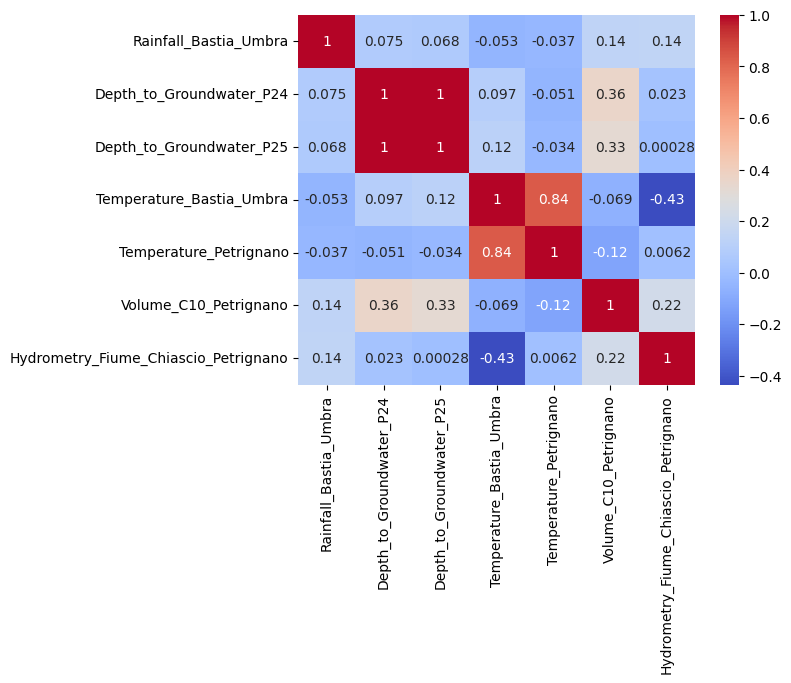

In [12]:
df1 = df.drop('Date', axis=1)
corr = df1.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True)

In [13]:
df.drop(['Rainfall_Bastia_Umbra','Depth_to_Groundwater_P24','Temperature_Bastia_Umbra',
         'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'], axis= 1, inplace=True)

df.head()

,Date,Depth_to_Groundwater_P25
0,14/03/2006,-22.18
1,15/03/2006,-22.14
2,16/03/2006,-22.04
3,17/03/2006,-22.04
4,18/03/2006,-22.04


In [14]:
from datetime import datetime, date

# Convert date to datetime object and set it as index of dataset
df['date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")

df.drop(['Date'], axis=1, inplace=True)

df.set_index("date", inplace=True)

df.index = pd.date_range(start=df.index[0], periods=len(df), freq='D')

In [15]:
df.index

DatetimeIndex(['2006-03-14', '2006-03-15', '2006-03-16', '2006-03-17',
               '2006-03-18', '2006-03-19', '2006-03-20', '2006-03-21',
               '2006-03-22', '2006-03-23',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=5223, freq='D')

In [16]:
# Rename the columns for simpler reference
df.rename(columns={'Depth_to_Groundwater_P25': 'depth_to_groundwater'}, inplace=True)

df

,depth_to_groundwater
2006-03-14,-22.18
2006-03-15,-22.14
2006-03-16,-22.04
2006-03-17,-22.04
2006-03-18,-22.04
...,...
2020-06-26,-25.07
2020-06-27,-25.11
2020-06-28,-25.19
2020-06-29,-25.18


## Handle missing value

In [17]:
df.isna().sum()

depth_to_groundwater    39
dtype: int64

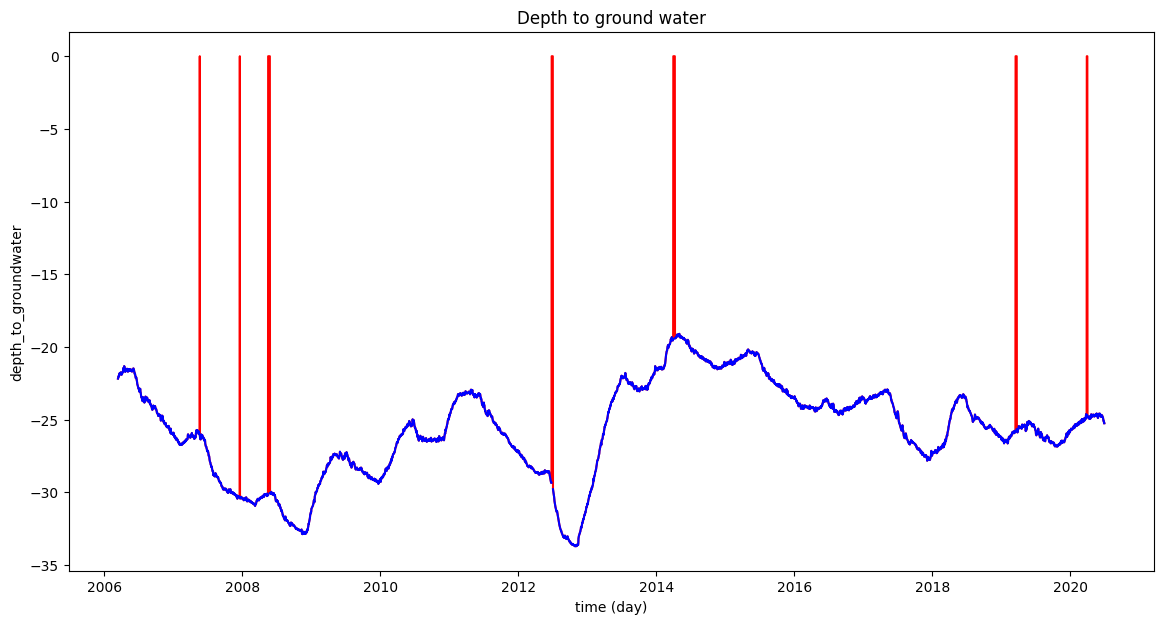

In [18]:
# Plot the NaN values by filling NaN with zero
plt.figure(figsize=(14,7))
sns.lineplot(df['depth_to_groundwater'].fillna(0), color='red') # NaN values
plt.plot(df['depth_to_groundwater'], color='blue') 
plt.title("Depth to ground water")
plt.xlabel("time (day)")
plt.show()

Text(0.5, 0, 'time (day)')

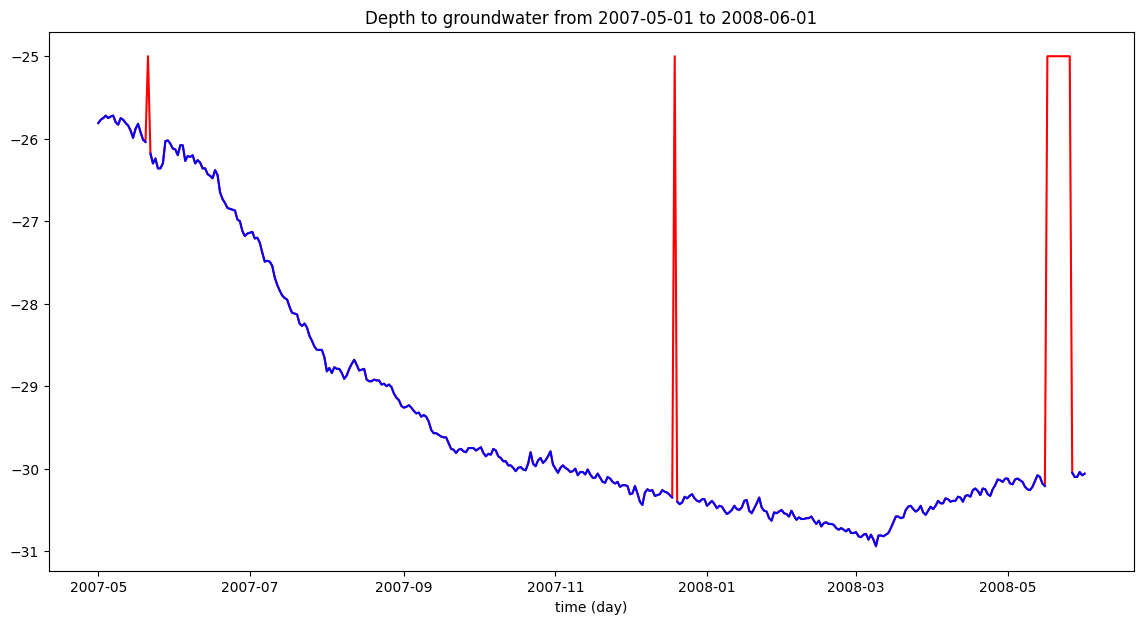

In [19]:
# Plot NaN values that appear across specific time period
start = '2007-05-01'
end = '2008-06-01'

specific_range_df = df.loc[start:end]

plt.figure(figsize=(14,7))
plt.plot(specific_range_df.fillna(-25), color='red') # NaN value is filling with -25 instead of zero for better visualization
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end}")
plt.xlabel('time (day)')


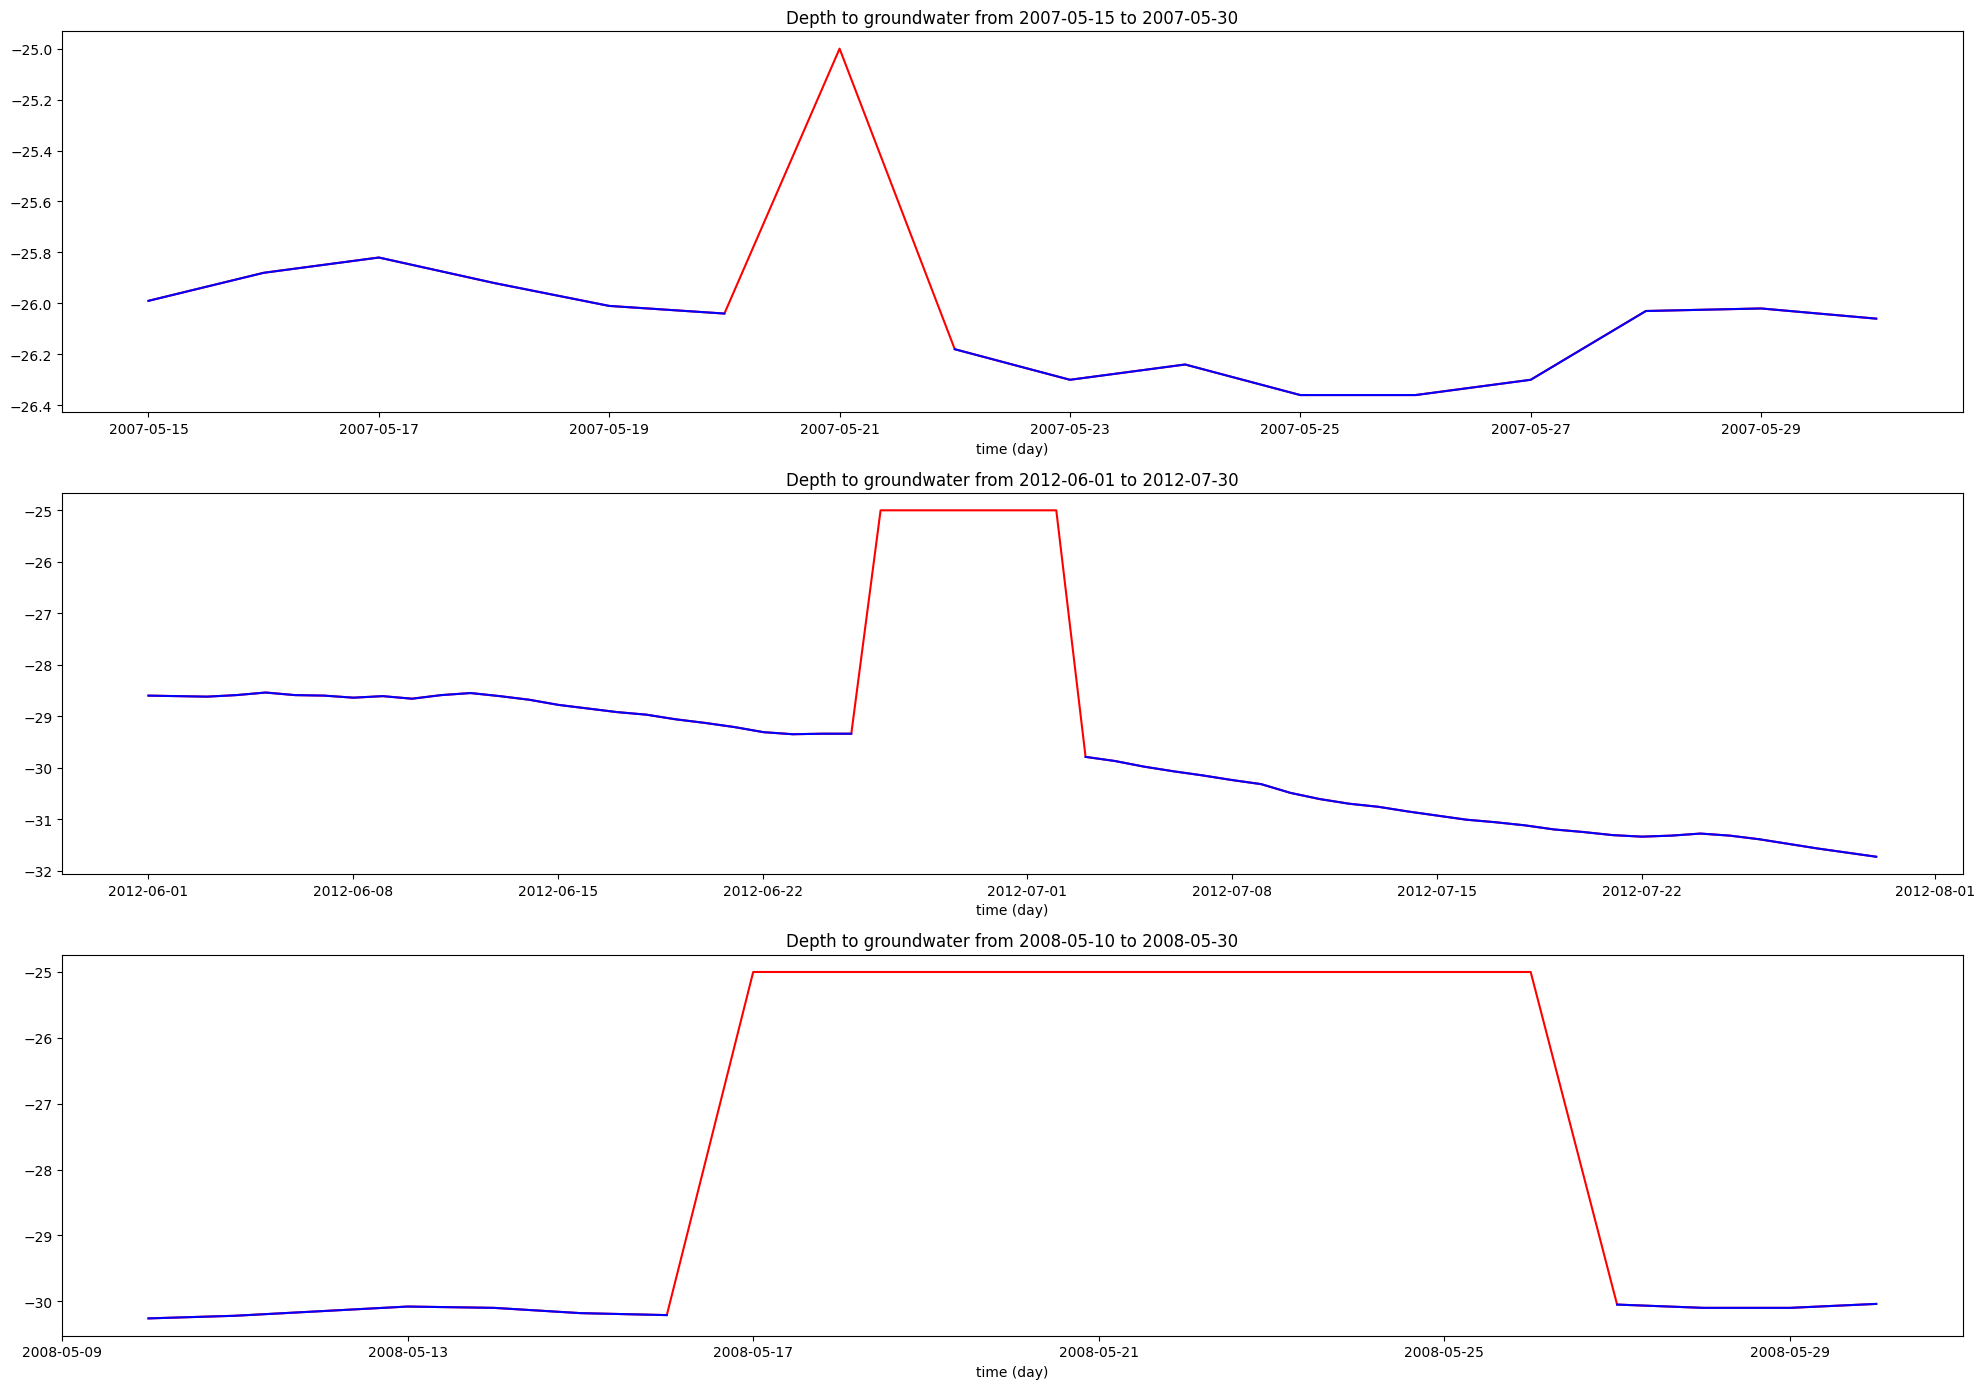

In [20]:
# Plot particular NaN value in particular time period in larger sclae for better visualization

start = '2007-05-15'
end = '2007-05-30'
specific_range_df = df.loc[start:end]

plt.figure(figsize=(20,14))
plt.subplot(3,1,1)
plt.plot(specific_range_df.fillna(-25), color='red') # NaN value
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end}")
plt.xlabel('time (day)')


start = '2012-06-01'
end = '2012-07-30'
specific_range_df = df.loc[start:end]

plt.subplot(3,1,2)
plt.plot(specific_range_df.fillna(-25), color='red') # NaN value
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end}")
plt.xlabel('time (day)')

start = '2008-05-10'
end = '2008-05-30'
specific_range_df = df.loc[start:end]

plt.subplot(3,1,3)
plt.plot(specific_range_df.fillna(-25), color='red') # NaN value
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end}")
plt.xlabel('time (day)')

plt.tight_layout()
plt.show()

### Comparison of different ways of handling missing values

C:\Users\yizha\AppData\Local\Temp\ipykernel_2500\3749884825.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(specific_range_df.fillna(method='ffill'), color='red') # fill NaN value with forward fill
C:\Users\yizha\AppData\Local\Temp\ipykernel_2500\3749884825.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(specific_range_df.fillna(method='bfill'), color='red') # fill NaN value with backward fill


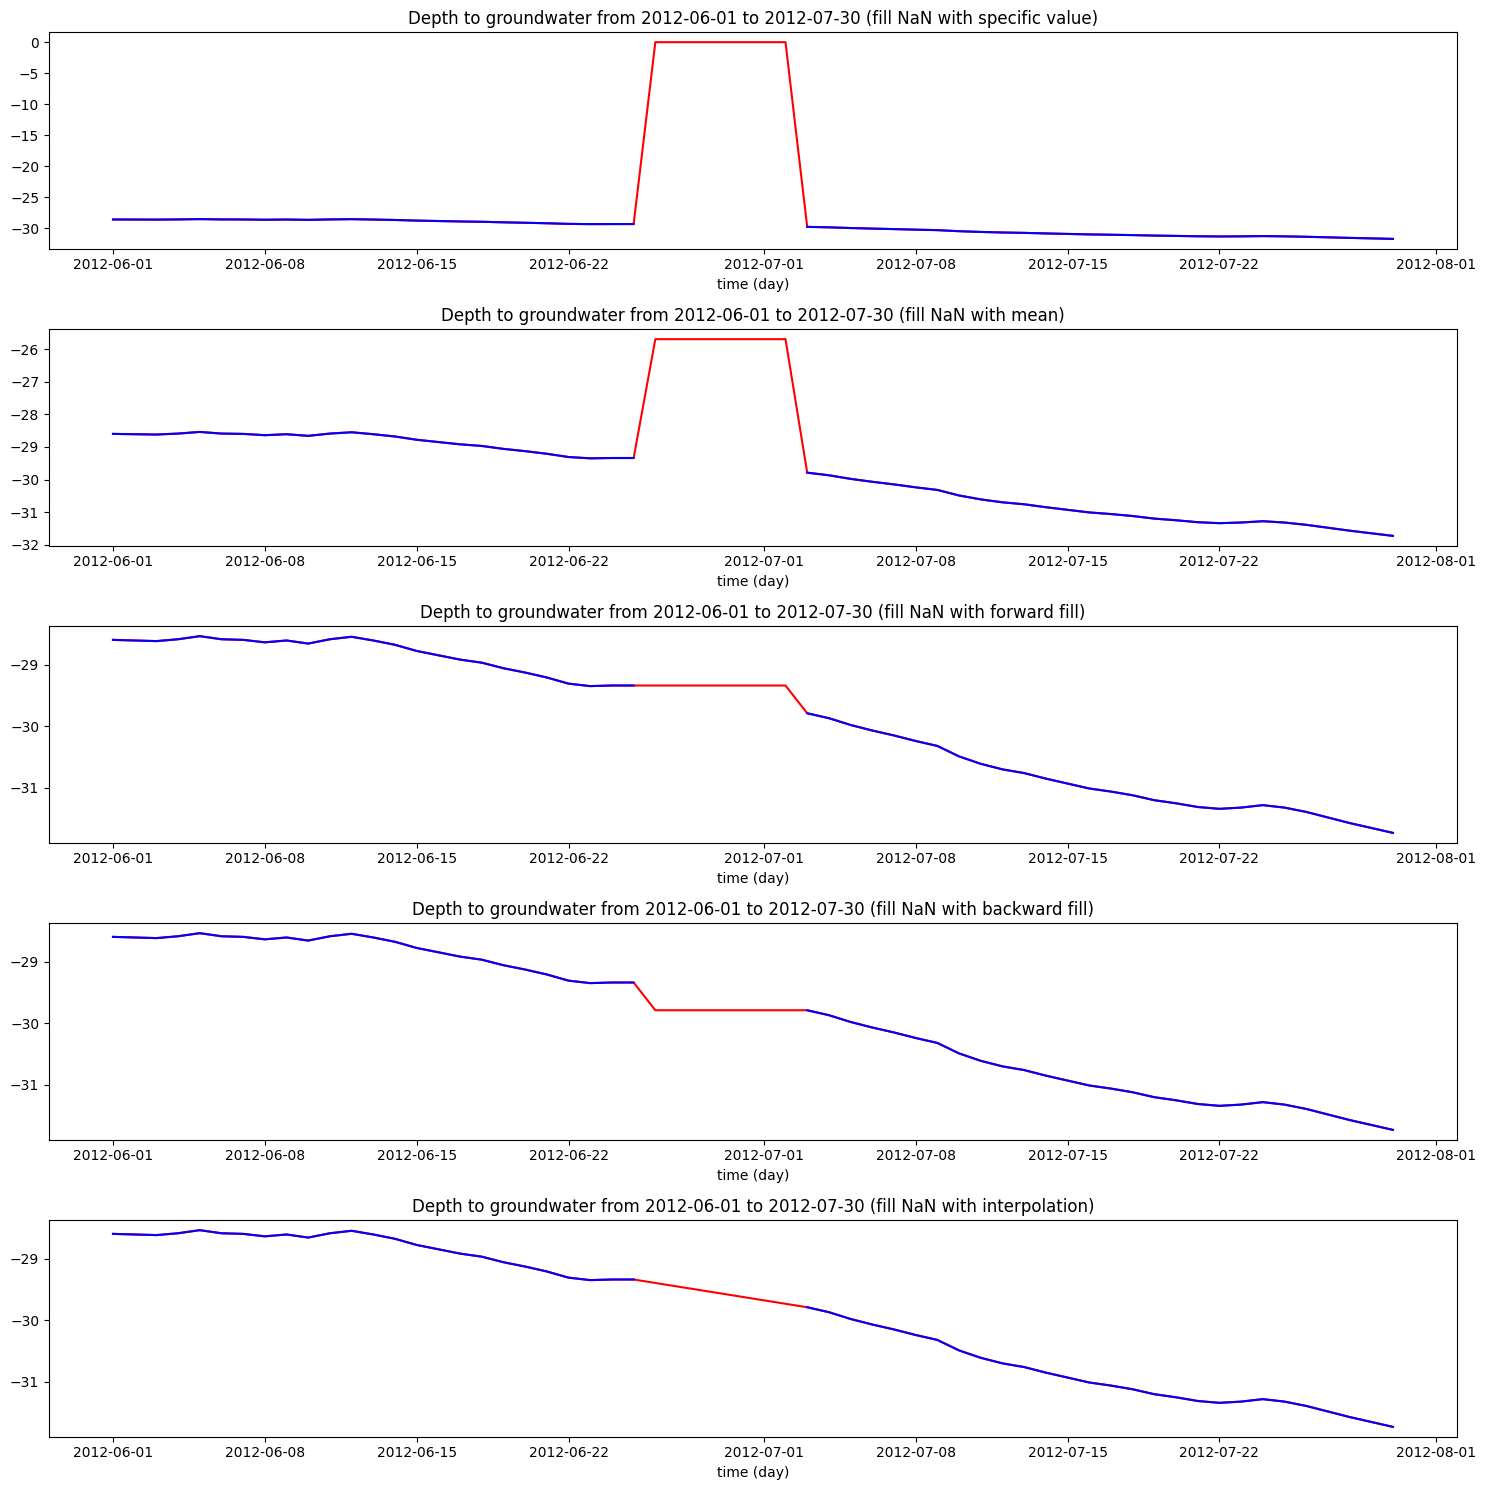

In [21]:
# Plot different ways to handle NaN value
start = '2012-06-01'
end = '2012-07-30'

specific_range_df = df.loc[start:end]

plt.figure(figsize=(15,15))

plt.subplot(5,1,1)
plt.plot(specific_range_df.fillna(0), color='red') # fill NaN value with zero
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with specific value)")
plt.xlabel('time (day)')

plt.subplot(5,1,2)
plt.plot(specific_range_df.fillna(df['depth_to_groundwater'].mean()), color='red') # fill NaN value with mean
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with mean)")
plt.xlabel('time (day)')

plt.subplot(5,1,3)
plt.plot(specific_range_df.fillna(method='ffill'), color='red') # fill NaN value with forward fill
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with forward fill)")
plt.xlabel('time (day)')

plt.subplot(5,1,4)
plt.plot(specific_range_df.fillna(method='bfill'), color='red') # fill NaN value with backward fill
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with backward fill)")
plt.xlabel('time (day)')

df1 = df.copy()
df1 = df1['depth_to_groundwater'].interpolate(method='time') # fill NaN value with interpolate
specific_range_df1 = df1.loc[start:end]
plt.subplot(5,1,5)
plt.plot(specific_range_df1, color='red')
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with interpolation)")
plt.xlabel('time (day)')

plt.tight_layout()
plt.show()

C:\Users\yizha\AppData\Local\Temp\ipykernel_2500\3291994751.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(specific_range_df.fillna(method='ffill'), color='red') # fill NaN value with forward fill
C:\Users\yizha\AppData\Local\Temp\ipykernel_2500\3291994751.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(specific_range_df.fillna(method='bfill'), color='red') # fill NaN value with backward fill


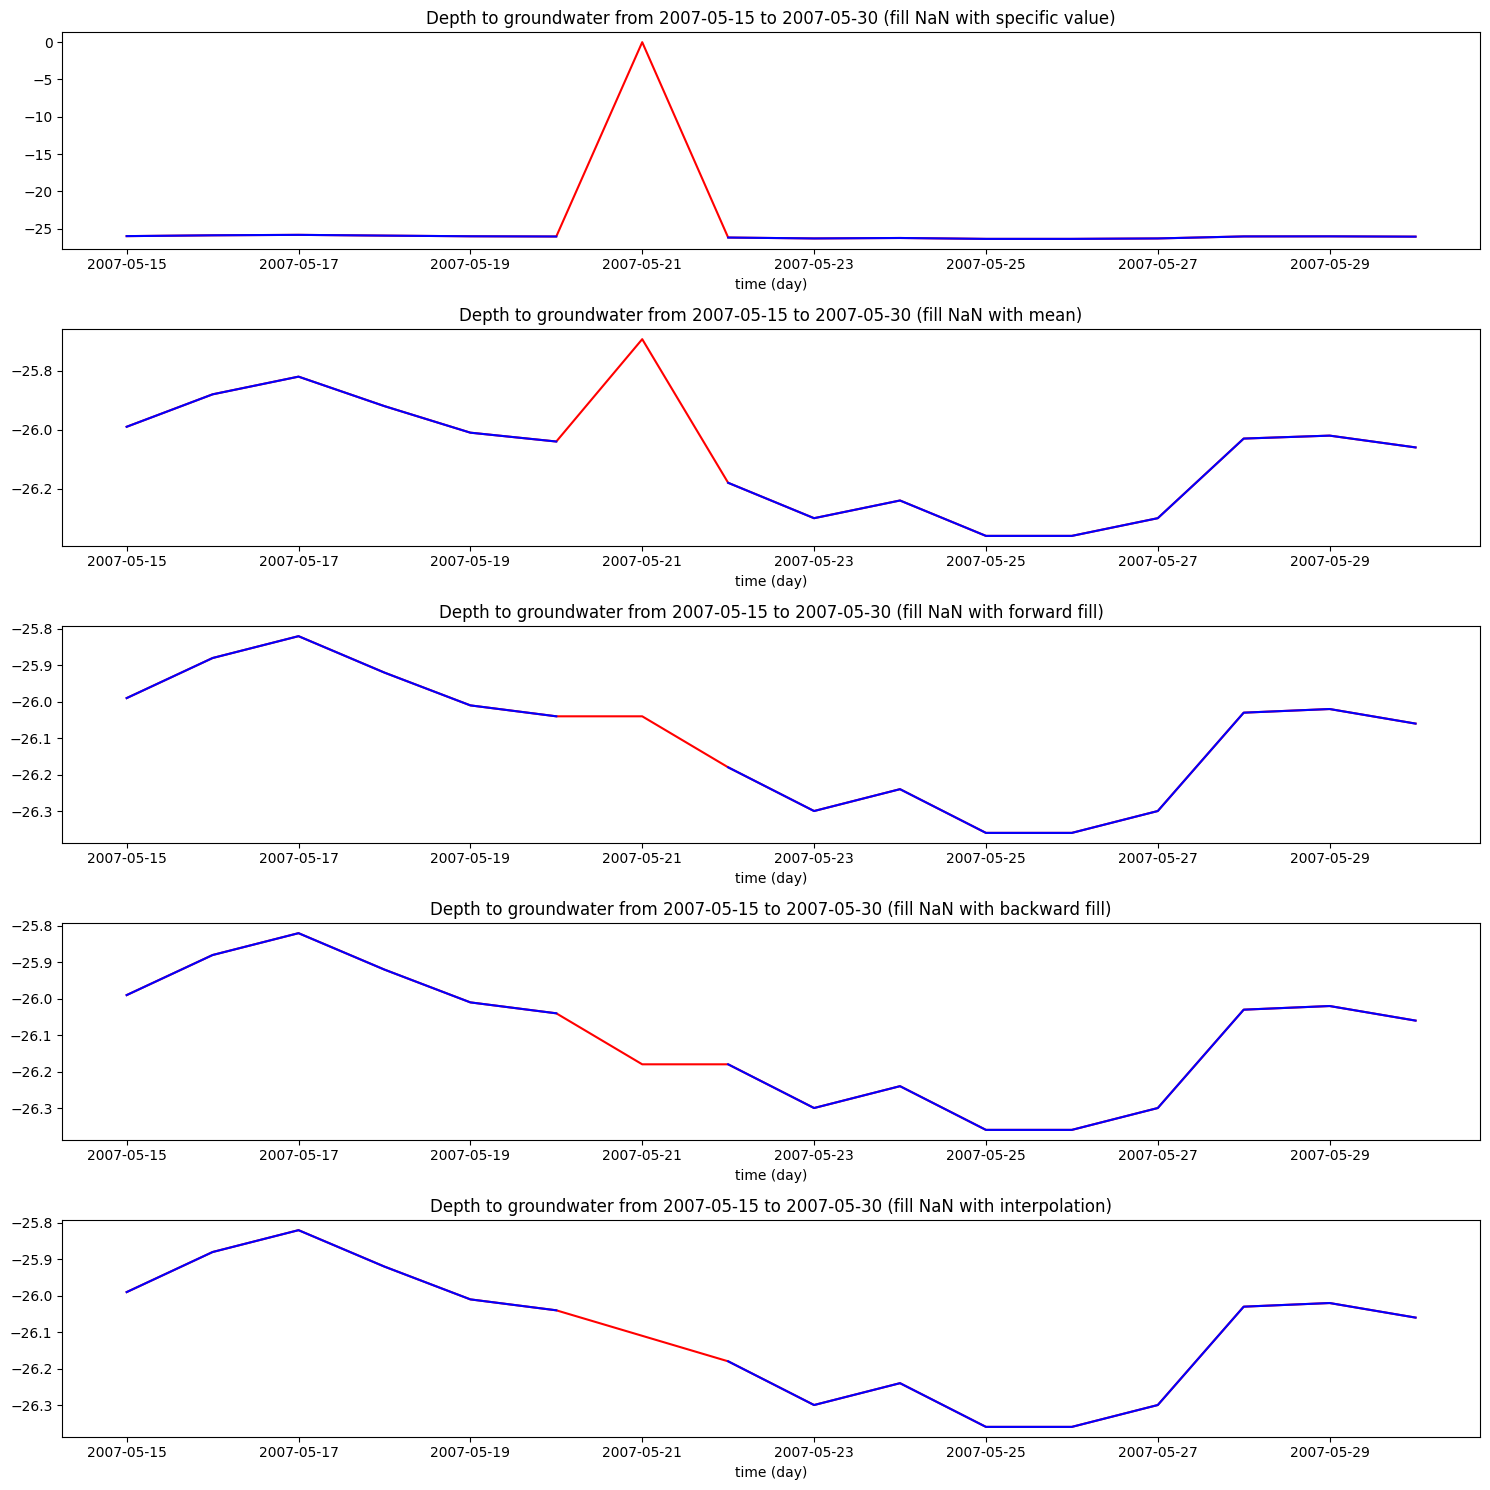

In [22]:
# Plot different ways to handle NaN value
start = '2007-05-15'
end = '2007-05-30'

specific_range_df = df.loc[start:end]

plt.figure(figsize=(15,15))

plt.subplot(5,1,1)
plt.plot(specific_range_df.fillna(0), color='red') # fill NaN value with zero
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with specific value)")
plt.xlabel('time (day)')

plt.subplot(5,1,2)
plt.plot(specific_range_df.fillna(df['depth_to_groundwater'].mean()), color='red') # fill NaN value with mean
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with mean)")
plt.xlabel('time (day)')

plt.subplot(5,1,3)
plt.plot(specific_range_df.fillna(method='ffill'), color='red') # fill NaN value with forward fill
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with forward fill)")
plt.xlabel('time (day)')

plt.subplot(5,1,4)
plt.plot(specific_range_df.fillna(method='bfill'), color='red') # fill NaN value with backward fill
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with backward fill)")
plt.xlabel('time (day)')

df1 = df.copy()
df1 = df1['depth_to_groundwater'].interpolate(method='time') # fill NaN value with interpolate
specific_range_df1 = df1.loc[start:end]
plt.subplot(5,1,5)
plt.plot(specific_range_df1, color='red')
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with interpolation)")
plt.xlabel('time (day)')

plt.tight_layout()
plt.show()

C:\Users\yizha\AppData\Local\Temp\ipykernel_2500\835327577.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(specific_range_df.fillna(method='ffill'), color='red') # fill NaN value with forward fill
C:\Users\yizha\AppData\Local\Temp\ipykernel_2500\835327577.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(specific_range_df.fillna(method='bfill'), color='red') # fill NaN value with backward fill


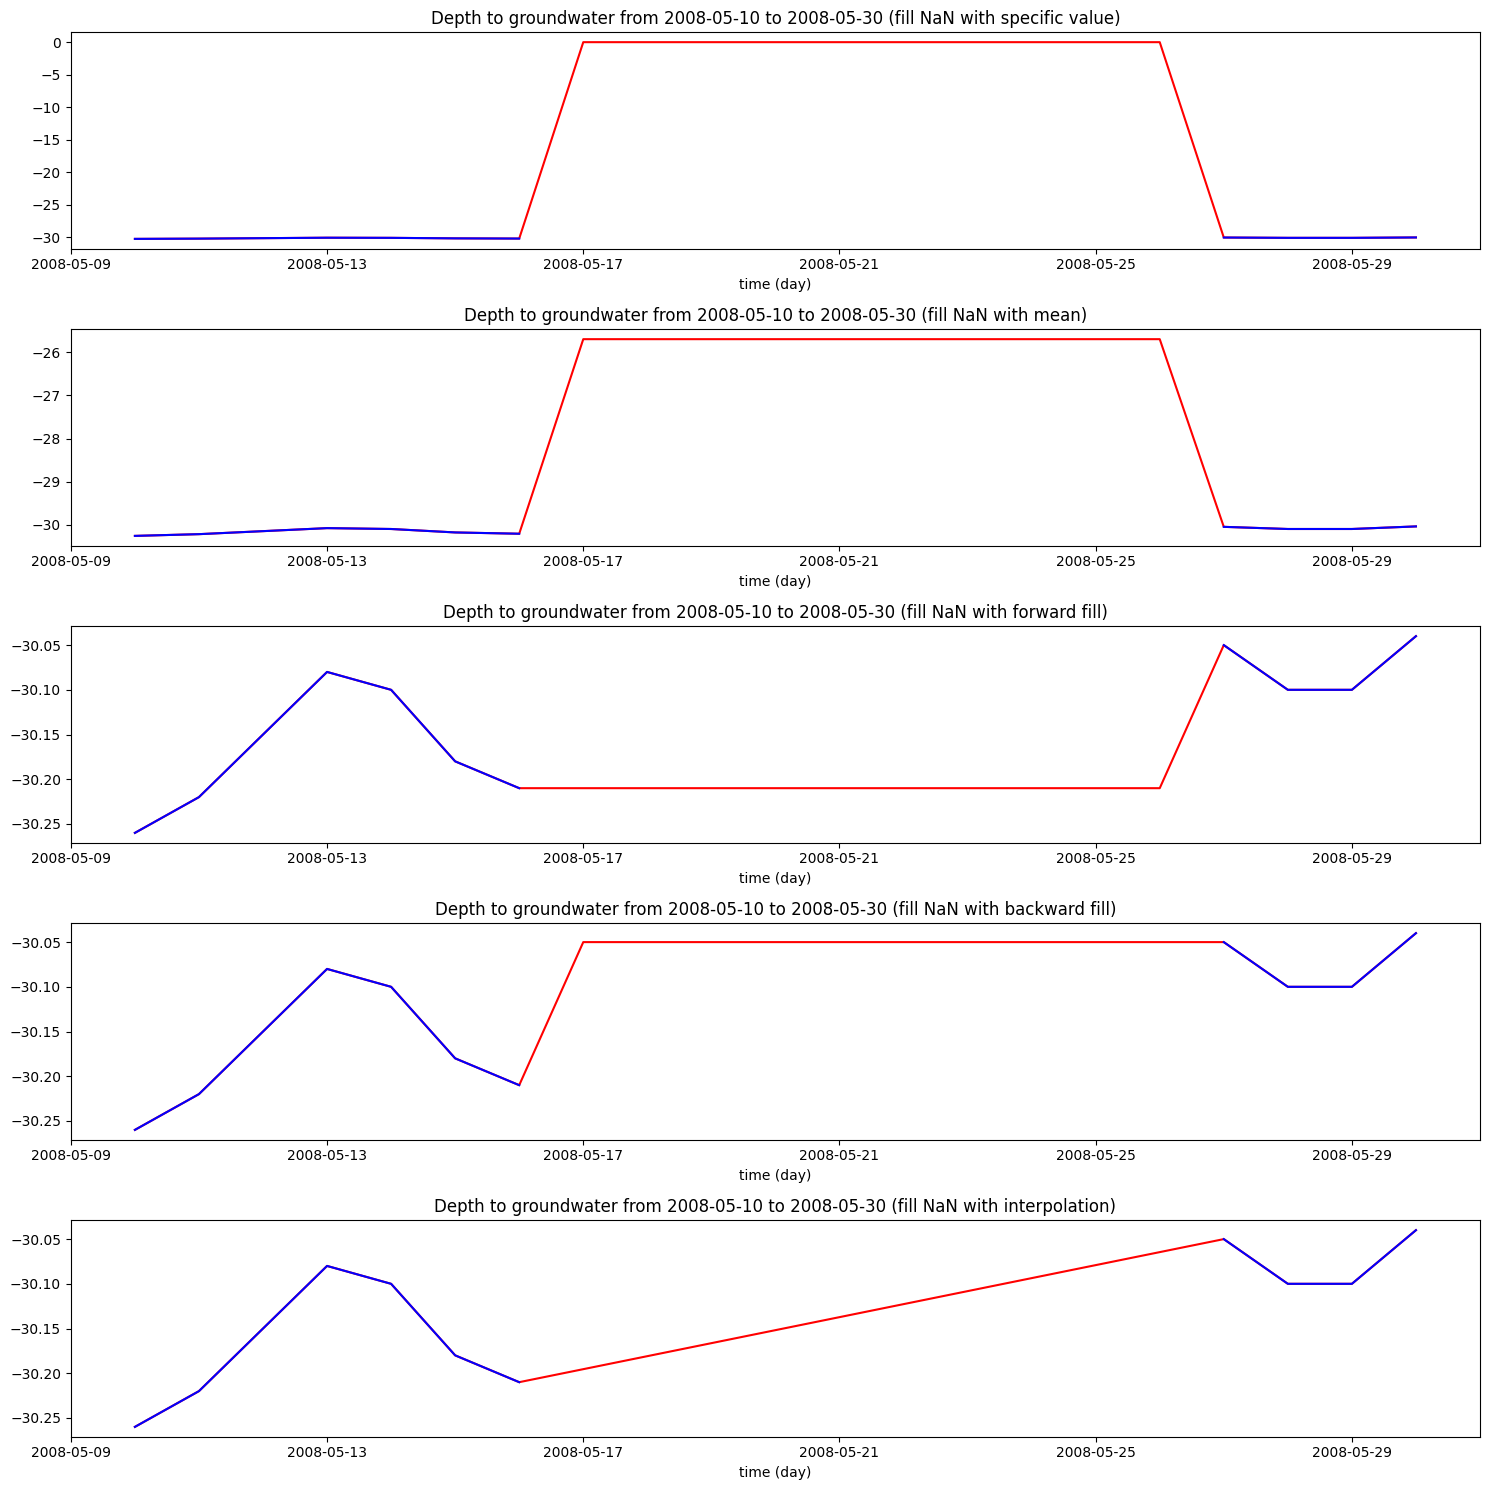

In [23]:
# Plot different ways to handle NaN value
start = '2008-05-10'
end = '2008-05-30'

specific_range_df = df.loc[start:end]

plt.figure(figsize=(15,15))

plt.subplot(5,1,1)
plt.plot(specific_range_df.fillna(0), color='red') # fill NaN value with zero
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with specific value)")
plt.xlabel('time (day)')

plt.subplot(5,1,2)
plt.plot(specific_range_df.fillna(df['depth_to_groundwater'].mean()), color='red') # fill NaN value with mean
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with mean)")
plt.xlabel('time (day)')

plt.subplot(5,1,3)
plt.plot(specific_range_df.fillna(method='ffill'), color='red') # fill NaN value with forward fill
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with forward fill)")
plt.xlabel('time (day)')

plt.subplot(5,1,4)
plt.plot(specific_range_df.fillna(method='bfill'), color='red') # fill NaN value with backward fill
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with backward fill)")
plt.xlabel('time (day)')

df1 = df.copy()
df1 = df1['depth_to_groundwater'].interpolate(method='time') # fill NaN value with interpolate
specific_range_df1 = df1.loc[start:end]
plt.subplot(5,1,5)
plt.plot(specific_range_df1, color='red')
plt.plot(specific_range_df, color='blue')
plt.title(f"Depth to groundwater from {start} to {end} (fill NaN with interpolation)")
plt.xlabel('time (day)')

plt.tight_layout()
plt.show()

Based on the graph, interpolate seems to be the best options as it fills up the NaN value smoothly with the existing value.

In [24]:
# Fill up NaN value with interpolate
df['depth_to_groundwater'].interpolate(method='time', inplace=True)

df.isna().sum()

C:\Users\yizha\AppData\Local\Temp\ipykernel_2500\4029016854.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth_to_groundwater'].interpolate(method='time', inplace=True)


depth_to_groundwater    0
dtype: int64

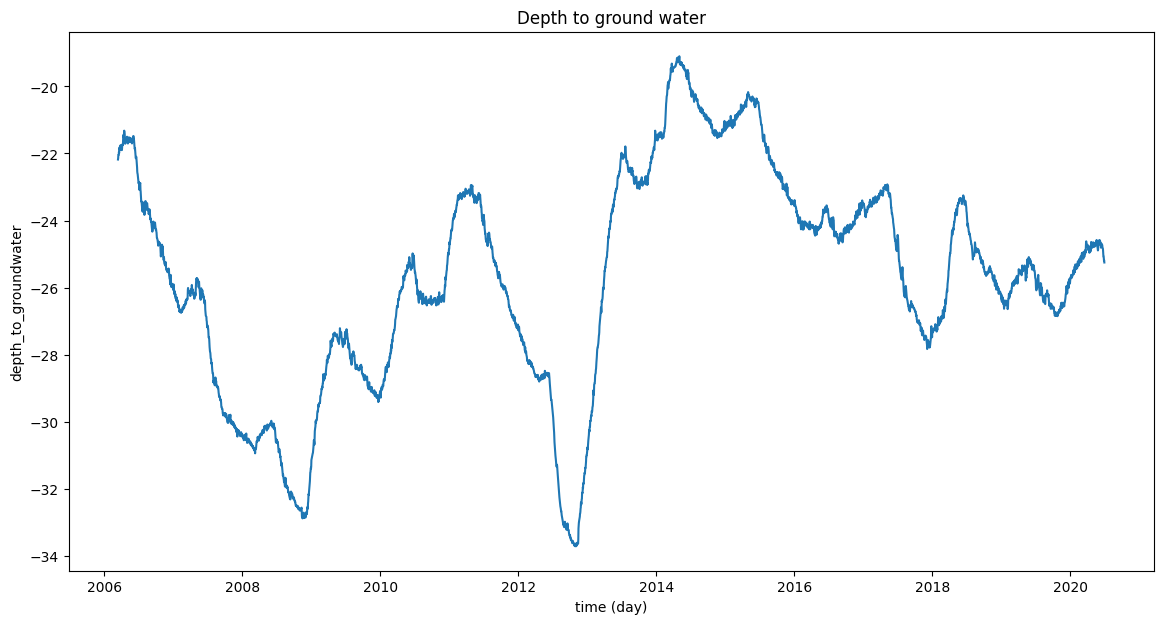

In [25]:
# Plot dataset after handle missing value
plt.figure(figsize=(14,7))
sns.lineplot(df['depth_to_groundwater'].fillna(0)) #To show that no missing value anymore
plt.title("Depth to ground water")
plt.xlabel("time (day)")
plt.show()

## Resampling

In [26]:
# Downsampling the dataset frequency from day to week
df_weekly = df.resample("W").mean()

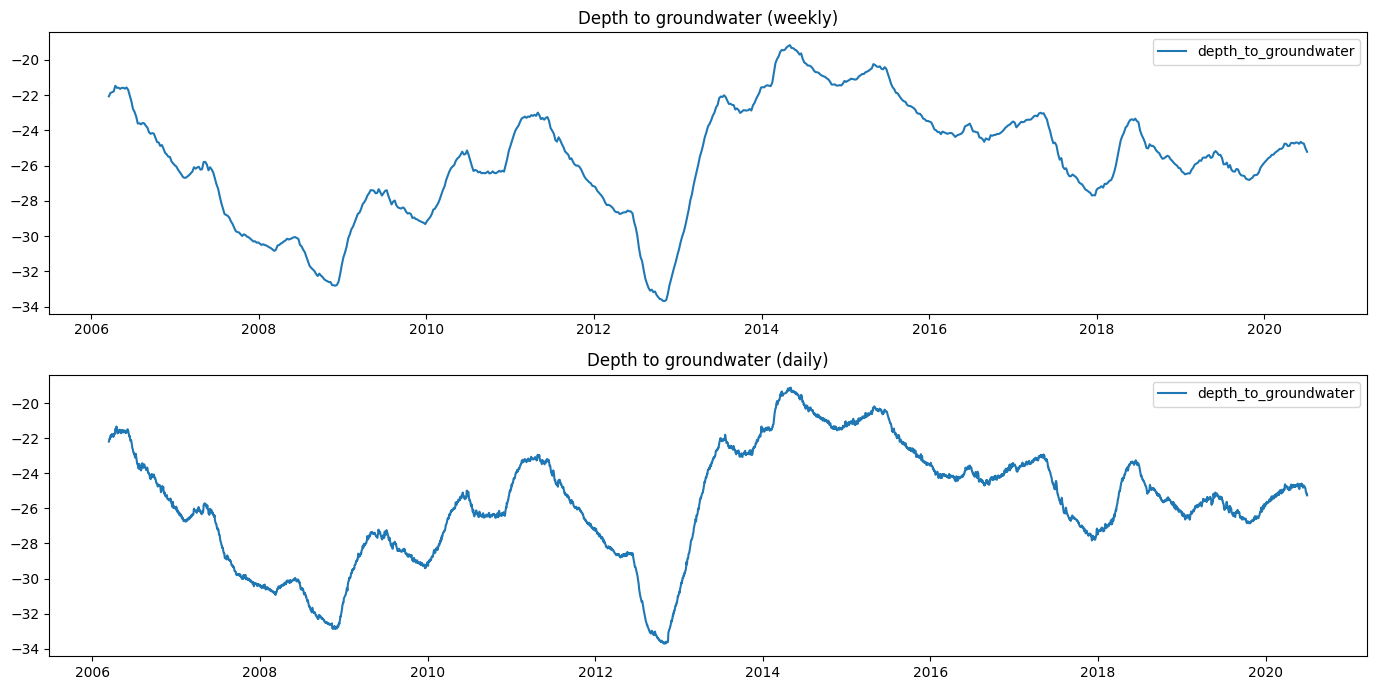

In [27]:
# Comparison between dataset before and after resampling
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
sns.lineplot(df_weekly)
plt.title("Depth to groundwater (weekly)")
plt.subplot(2,1,2)
sns.lineplot(df)
plt.title("Depth to groundwater (daily)")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Depth to groundwater (time in day) from 2006-03-19 to 2008-02-10')

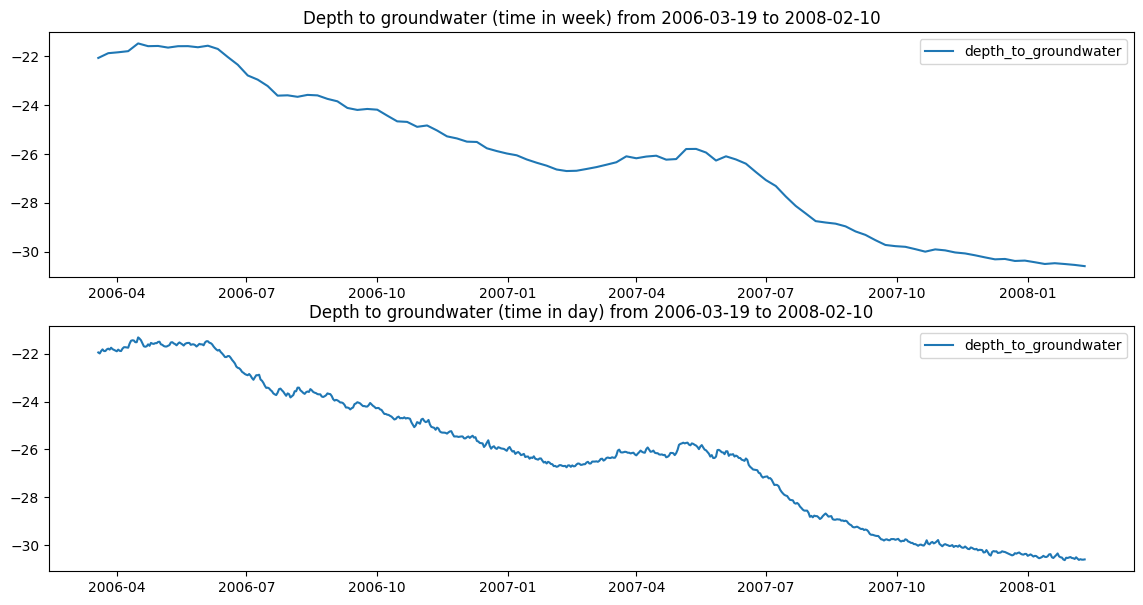

In [28]:
# Comparison between dataset before and after resampling
start = '2006-03-19'
end = '2008-02-10'

specific_range_df_weekly = df_weekly.loc[start:end]
specific_range_df = df.loc[start:end]

plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
sns.lineplot(specific_range_df_weekly)
plt.title(f"Depth to groundwater (time in week) from {start} to {end}")
plt.subplot(2,1,2)
sns.lineplot(specific_range_df)
plt.title(f"Depth to groundwater (time in day) from {start} to {end}")

In [29]:
df = df_weekly

In [30]:
# Inspect the interval of data
df.index

DatetimeIndex(['2006-03-19', '2006-03-26', '2006-04-02', '2006-04-09',
               '2006-04-16', '2006-04-23', '2006-04-30', '2006-05-07',
               '2006-05-14', '2006-05-21',
               ...
               '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21',
               '2020-06-28', '2020-07-05'],
              dtype='datetime64[ns]', length=747, freq='W-SUN')

Check the continuity of the dataset after downsampling, make sure no missing weeks

In [31]:
start = df.index.min()
end = df.index.max()
complete_date_range = pd.date_range(start=start, end=end, freq='W') # create a complete weekly date range

missing_weeks = complete_date_range.difference(df.index) # find the difference between complter weekly date range and the dataset
print(f"Missing weeks: {missing_weeks}")


Missing weeks: DatetimeIndex([], dtype='datetime64[ns]', freq='W-SUN')


# ARIMA

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [33]:
df_arima = df.copy()

In [34]:
from statsmodels.tsa.stattools import adfuller

#Check stationarity 
adf_test = adfuller(df_arima['depth_to_groundwater'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:', adf_test[4])

ADF Statistic: -3.2589584364925495
p-value: 0.016815718504471742
Critical Values: {'1%': -3.4391937559530965, '5%': -2.8654430713273373, '10%': -2.568848417404698}


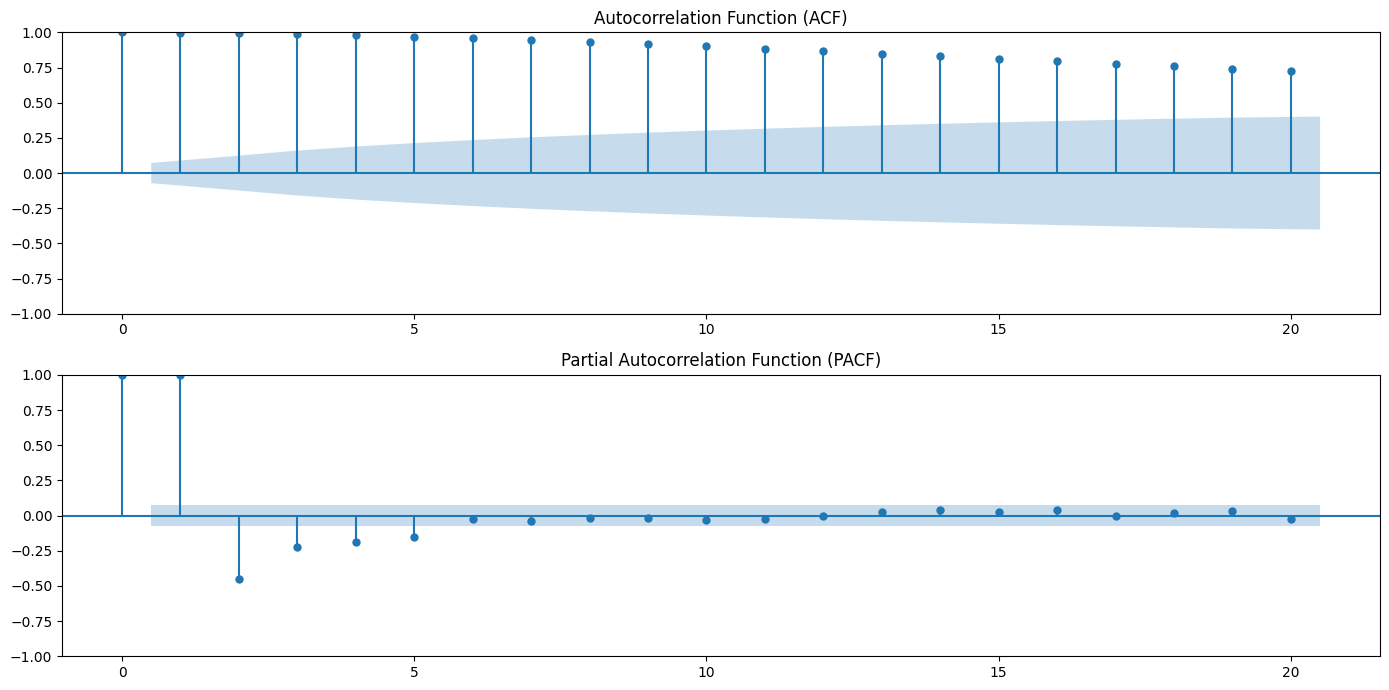

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

numlags = 20

plt.figure(figsize=(14, 7))
# ACF plot
plt.subplot(2, 1, 1)
plot_acf(df_arima['depth_to_groundwater'], lags=numlags, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(df_arima['depth_to_groundwater'], lags=numlags, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [36]:
from statsmodels.tsa.stattools import acf, pacf
# Get ACF and PACF values
acf_values = acf(df_arima['depth_to_groundwater'], nlags=numlags)
pacf_values = pacf(df_arima['depth_to_groundwater'], nlags=numlags)

# Calculate the 95% confidence interval threshold
n = len(df_arima['depth_to_groundwater'])
threshold = 1.96 / np.sqrt(n)

# Count significant values for p and q
significant_p_values = sum(abs(pacf_values[1:]) > threshold)
significant_q_values = sum(abs(acf_values[1:]) > threshold)

# Print the results
print(f"Number of significant p values: {significant_p_values}")
print(f"Number of significant q values: {significant_q_values}")

Number of significant p values: 20
Number of significant q values: 20


In [37]:
# Split dataset to train test
train_size = int(len(df_arima['depth_to_groundwater']) * 0.75)
train,test = df_arima['depth_to_groundwater'][:train_size], df_arima['depth_to_groundwater'][train_size:]

In [38]:
# Define the model and fit it
model = ARIMA(train, order=(significant_p_values, 0, significant_q_values))
model_fit = model.fit()

c:\Users\yizha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\yizha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\yizha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
# Make prediction based on length of test
pred = model_fit.forecast(len(test))

In [40]:
# Evaluation Metrices
mae = mean_absolute_error(test, pred)
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (ARIMA): {mae}')
print(f'Mean Squared Error (ARIMA): {mse}')
print(f'Root Mean Squared Error (ARIMA): {rmse}')


Mean Absolute Error (ARIMA): 0.8597619186454893
Mean Squared Error (ARIMA): 1.2381632497930664
Root Mean Squared Error (ARIMA): 1.1127278417443622


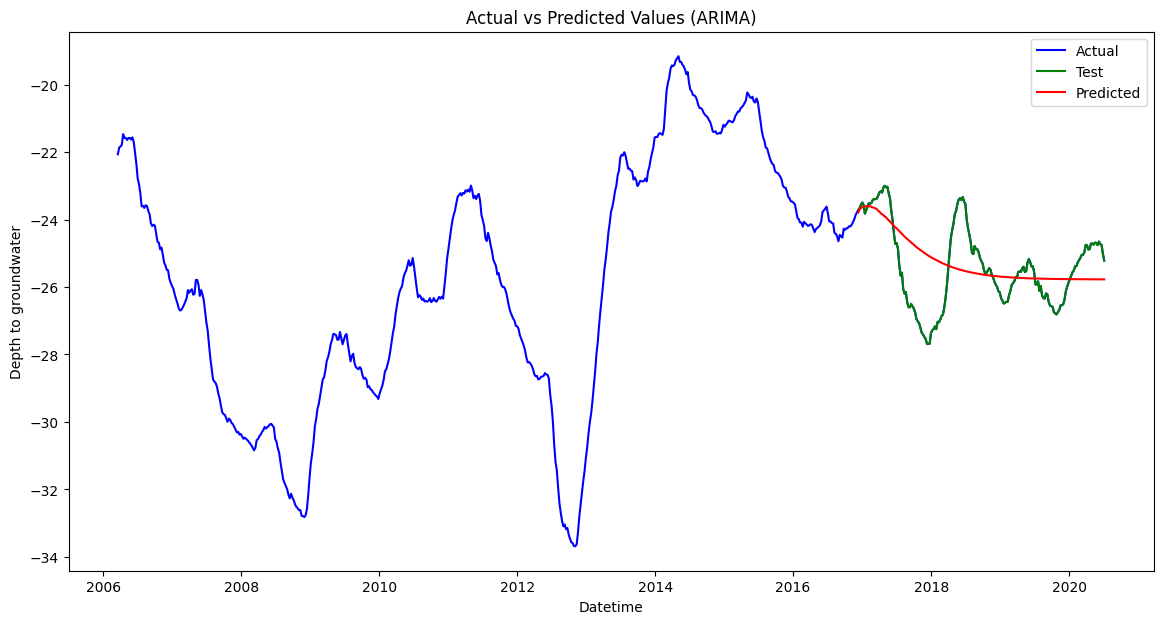

In [41]:
# Plot the prediction against actual value
plt.figure(figsize=(14, 7))
plt.plot(df_arima['depth_to_groundwater'], label='Actual', color='blue')
plt.plot(test, label='Test', color='green')
plt.plot(pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Values (ARIMA)')
plt.xlabel('Datetime')
plt.ylabel('Depth to groundwater')
plt.legend()
plt.show()

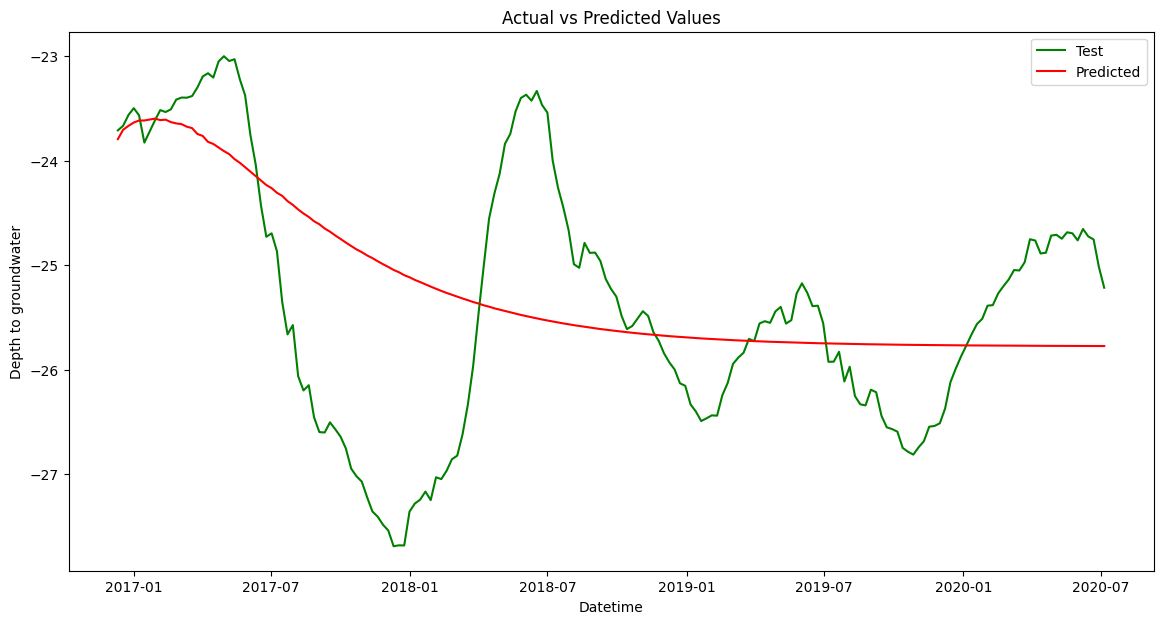

In [42]:
# Plot the prediction against test value
plt.figure(figsize=(14, 7))
plt.plot(test, label='Test', color='green')
plt.plot(pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Datetime')
plt.ylabel('Depth to groundwater')
plt.legend()
plt.show()

In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     depth_to_groundwater   No. Observations:                  560
Model:                 ARIMA(20, 0, 20)   Log Likelihood                 381.701
Date:                  Wed, 04 Dec 2024   AIC                           -679.402
Time:                          19:57:42   BIC                           -497.629
Sample:                      03-19-2006   HQIC                          -608.424
                           - 12-04-2016                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7762      1.187    -21.723      0.000     -28.102     -23.451
ar.L1          0.1437      2.902      0.050      0.961      -5.544       5.832
ar.L2         -0.2934      2.839     -0.103      0.918      -5.859       5.272
ar.L3          0.1010      2.336      0.043      0.966      -4.478       4.680
ar.L4         -0.1373      2.094     -0.066      0.948      -4.242       3.967
ar.L5          0.2655      1.673      0.159      0.874      -3.013       3.544
ar.L6          0.0269      1.957      0.014      0.989      -3.808       3.862
ar.L7          0.3109      1.655      0.188      0.851      -2.934       3.556
ar.L8          0.1215      1.828      0.066      0.947      -3.461       3.704
ar.L9          0.3562      1.631      0.218      0.827      -2.841       3.554
ar.L10         0.1896      0.874      0.217      0.828      -1.524       1.903
ar.L11         0.2580      1.100      0.235      0.815      -1.897       2.413
ar.L12        -0.0363      1.152     -0.032      0.975      -2.294       2.221
ar.L13         0.0764      1.324      0.058      0.954      -2.519       2.672
ar.L14        -0.1902      1.169     -0.163      0.871      -2.481       2.100
ar.L15         0.0373      1.084      0.034      0.973      -2.087       2.161
ar.L16        -0.2603      0.908     -0.287      0.774      -2.040       1.520
ar.L17         0.1704      0.889      0.192      0.848      -1.571       1.912
ar.L18        -0.1755      0.895     -0.196      0.845      -1.929       1.578
ar.L19         0.0393      0.902      0.044      0.965      -1.728       1.807
ar.L20        -0.1317      0.841     -0.157      0.875      -1.779       1.516
ma.L1          1.3260      2.902      0.457      0.648      -4.362       7.014
ma.L2          1.8708      3.912      0.478      0.633      -5.798       9.539
ma.L3          2.2215      3.802      0.584      0.559      -5.230       9.674
ma.L4          2.6946      4.969      0.542      0.588      -7.045      12.434
ma.L5          2.8360      6.233      0.455      0.649      -9.380      15.052
ma.L6          3.0021      6.501      0.462      0.644      -9.739      15.743
ma.L7          2.8652      6.956      0.412      0.680     -10.769      16.499
ma.L8          2.7184      6.931      0.392      0.695     -10.866      16.303
ma.L9          2.3302      6.106      0.382      0.703      -9.638      14.298
ma.L10         1.9598      5.697      0.344      0.731      -9.207      13.126
ma.L11         1.4129      5.059      0.279      0.780      -8.504      11.329
ma.L12         1.1093      3.984      0.278      0.781      -6.700       8.919
ma.L13         0.7199      3.062      0.235      0.814      -5.281       6.721
ma.L14         0.5680      2.298      0.247      0.805      -3.936       5.072
ma.L15         0.3311      1.439      0.230      0.818      -2.489       3.151
ma.L16         0.4143      1.182      0.351      0.726      -1.902       2.730
ma.L17         0.1342      1.011      0.133      0.894      -1.

# LSTM + ARIMA

## LSTM

In [44]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
# Split dataeset to train test 
train_size = int(len(df['depth_to_groundwater']) * 0.75)
trainset, testset = df['depth_to_groundwater'][:train_size], df['depth_to_groundwater'][train_size:]

In [46]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(-1, 0))
data_scaled = scaler.fit_transform(df['depth_to_groundwater'].values.reshape(-1, 1))

In [47]:
def create_dataset(df, look_back=1):
    X = [] 
    Y = []
    for i in range(len(df) - look_back):
        X.append(df[i:(i + look_back)])
        Y.append(df[i + look_back])
    return np.array(X), np.array(Y)

look_back = 4 

# Prepare data for LSTM
X_train, Y_train = create_dataset(data_scaled[:train_size], look_back)
X_test, Y_test = create_dataset(data_scaled[train_size:], look_back)



In [48]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1), kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # First LSTM layer with L2 regularization
model_lstm.add(Dropout(0.2))  # Dropout layer
model_lstm.add(LSTM(50, kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Second LSTM layer with L2 regularization
model_lstm.add(Dropout(0.2))  # Dropout layer
model_lstm.add(Dense(1))  # Output layer
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

# Define Early Stopping
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

model_lstm.summary()

# Train the model
history = model_lstm.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stopping])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 4, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100

556

In [49]:
# LSTM predictions on the test set
test_predictions_lstm = model_lstm.predict(X_test)
test_predictions_lstm = scaler.inverse_transform(test_predictions_lstm)

# Evaluation Metrices
rmse_lstm = np.sqrt(mean_squared_error(testset.values[look_back:], test_predictions_lstm))
mae_lstm = mean_absolute_error(testset.values[look_back:], test_predictions_lstm)
mse_lstm = mean_squared_error(testset.values[look_back:], test_predictions_lstm)

print(f'Mean Absolute Error (LSTM Only): {mae_lstm}')
print(f'Mean Squared Error (LSTM Only): {mse_lstm}')
print(f'Root Mean Squared Error (LSTM Only): {rmse_lstm}')

6/6 [==============================] - 1s 1ms/step
Mean Absolute Error (LSTM Only): 0.3170533144948634
Mean Squared Error (LSTM Only): 0.179884369809859
Root Mean Squared Error (LSTM Only): 0.4241277753341073


18/18 [==============================] - 0s 2ms/step


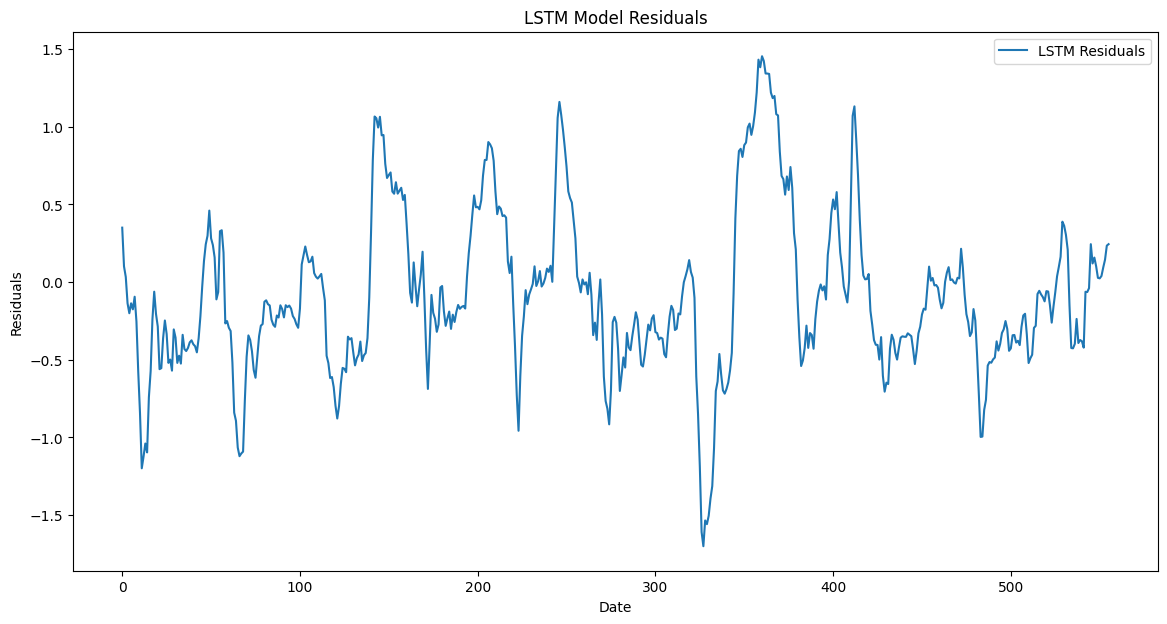

In [50]:
# LSTM predictions on the train set
train_predictions_lstm = model_lstm.predict(X_train)
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)

# Calculate residuals
train_residuals = trainset[look_back:].values - train_predictions_lstm.flatten()

# Plot LSTM residuals
plt.figure(figsize=(14, 7))
plt.plot(train_residuals, label='LSTM Residuals')
plt.title('LSTM Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

## ARIMA

In [51]:
adf_test = adfuller(train_residuals)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:', adf_test[4])

numlags = 20

from statsmodels.tsa.stattools import acf, pacf
# Get ACF and PACF values
acf_values = acf(train_residuals, nlags=numlags)
pacf_values = pacf(train_residuals, nlags=numlags)

# Calculate the 95% confidence interval threshold
n = len(train_residuals)
threshold = 1.96 / np.sqrt(n)

# Count significant values for p and q
significant_p_values = sum(abs(pacf_values[1:]) > threshold)
significant_q_values = sum(abs(acf_values[1:]) > threshold)

# Print the results
print(f"Number of significant p values: {significant_p_values}")
print(f"Number of significant q values: {significant_q_values}")

ADF Statistic: -4.951392724360264
p-value: 2.767171971327299e-05
Critical Values: {'1%': -3.442383534871275, '5%': -2.8668480382580386, '10%': -2.569597004924258}
Number of significant p values: 6
Number of significant q values: 17


In [52]:
model_arima= ARIMA(train_residuals, order=(significant_p_values, 0, significant_q_values))
model_arima_fit = model_arima.fit()

residual_forecast_arima = model_arima_fit.forecast(steps=len(testset))

c:\Users\yizha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  556
Model:                ARIMA(6, 0, 17)   Log Likelihood                 382.654
Date:                Wed, 04 Dec 2024   AIC                           -715.308
Time:                        19:58:31   BIC                           -607.288
Sample:                             0   HQIC                          -673.116
                                - 556                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0837      0.078     -1.079      0.281      -0.236       0.068
ar.L1          1.2863      0.227      5.672      0.000       0.842       1.731
ar.L2         -0.1309      0.252     -0.519      0.604      -0.625       0.364
ar.L3         -0.1886      0.224     -0.843      0.399      -0.627       0.250
ar.L4         -0.4031      0.199     -2.021      0.043      -0.794      -0.012
ar.L5          1.1434      0.257      4.453      0.000       0.640       1.647
ar.L6         -0.7520      0.166     -4.525      0.000      -1.078      -0.426
ma.L1          0.1368      0.233      0.587      0.557      -0.320       0.593
ma.L2         -0.1280      0.228     -0.561      0.574      -0.575       0.319
ma.L3         -0.0744      0.202     -0.368      0.713      -0.471       0.322
ma.L4          0.0968      0.219      0.442      0.659      -0.333       0.527
ma.L5         -0.4954      0.181     -2.743      0.006      -0.849      -0.141
ma.L6         -0.2031      0.126     -1.618      0.106      -0.449       0.043
ma.L7         -0.1416      0.096     -1.473      0.141      -0.330       0.047
ma.L8         -0.1622      0.068     -2.367      0.018      -0.296      -0.028
ma.L9          0.2721      0.063      4.322      0.000       0.149       0.396
ma.L10         0.1010      0.061      1.652      0.098      -0.019       0.221
ma.L11        -0.0058      0.071     -0.081      0.935      -0.145       0.133
ma.L12         0.0621      0.069      0.903      0.366      -0.073       0.197
ma.L13         0.0244      0.066      0.369      0.712      -0.105       0.154
ma.L14         0.0768      0.058      1.332      0.183      -0.036       0.190
ma.L15         0.0067      0.058      0.115      0.909      -0.107       0.121
ma.L16         0.0667      0.063      1.061      0.289      -0.057       0.190
ma.L17        -0.0172      0.066     -0.261      0.794      -0.147       0.112
sigma2         0.0147      0.001     18.903      0.000       0.013       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                41.71
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.23
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
# LSTM predictions on the test set
test_predictions_lstm = model_lstm.predict(X_test)
test_predictions_lstm = scaler.inverse_transform(test_predictions_lstm)
test_predictions_lstm = test_predictions_lstm.flatten()

#to show the difference in the length of prediction of two model
print(f"The length of arima forecast is: {len(residual_forecast_arima)}")
print(f"The length of lstm prediction is: {len(test_predictions_lstm)}")


# Calculate the difference in length between LSTM and ARIMA predictions
length_difference = len(residual_forecast_arima) - len(test_predictions_lstm)

# Prepare the last sequence of data
last_sequence = X_test[-1]  # Get the last sequence of data
last_sequence = last_sequence.reshape((1, look_back, 1))


# Predict the necessary number of steps 
additional_predictions = []
for i in range(length_difference):
    next_prediction = model_lstm.predict(last_sequence)
    next_prediction_scaled = scaler.inverse_transform(next_prediction)
    additional_predictions.append(next_prediction_scaled.flatten()[0])
        
    # Update the last sequence with the new prediction
    new_sequence = np.append(last_sequence.flatten()[1:], next_prediction.flatten())
    last_sequence = new_sequence.reshape((1, look_back, 1))

# Add the additional predictions to the LSTM predictions
test_predictions_lstm = np.concatenate([test_predictions_lstm, additional_predictions])

# Combine LSTM predictions with ARIMA residual forecasts
hybrid_predictions = test_predictions_lstm + residual_forecast_arima

# Evaluation metrics for hybrid model
rmse_hybrid = np.sqrt(mean_squared_error(testset.values, hybrid_predictions))
mse_hybrid = mean_squared_error(testset.values, hybrid_predictions)
mae_hybrid = mean_absolute_error(testset.values, hybrid_predictions)

print(f'Mean Absolute Error (Hybrid Model): {mae_hybrid}')
print(f'Mean Squared Error (Hybrid Model): {mse_hybrid}')
print(f'Root Mean Squared Error (Hybrid Model): {rmse_hybrid}')


6/6 [==============================] - 0s 2ms/step
The length of arima forecast is: 187
The length of lstm prediction is: 183
1/1 [==============================] - 0s 16ms/step
Mean Absolute Error (Hybrid Model): 0.13285604052956856
Mean Squared Error (Hybrid Model): 0.0285051776100216
Root Mean Squared Error (Hybrid Model): 0.16883476422236504


The main purpose of the code is to match up the length of arima forecast and the length of lstm prediction by making additional prediction. The difference in length is caused by the looking_back value, we set the looking_back value to 4 meaning the lstm will use 4 previous time steps to make each predictions. Thus naturally it reduces the number of prediction it can make.

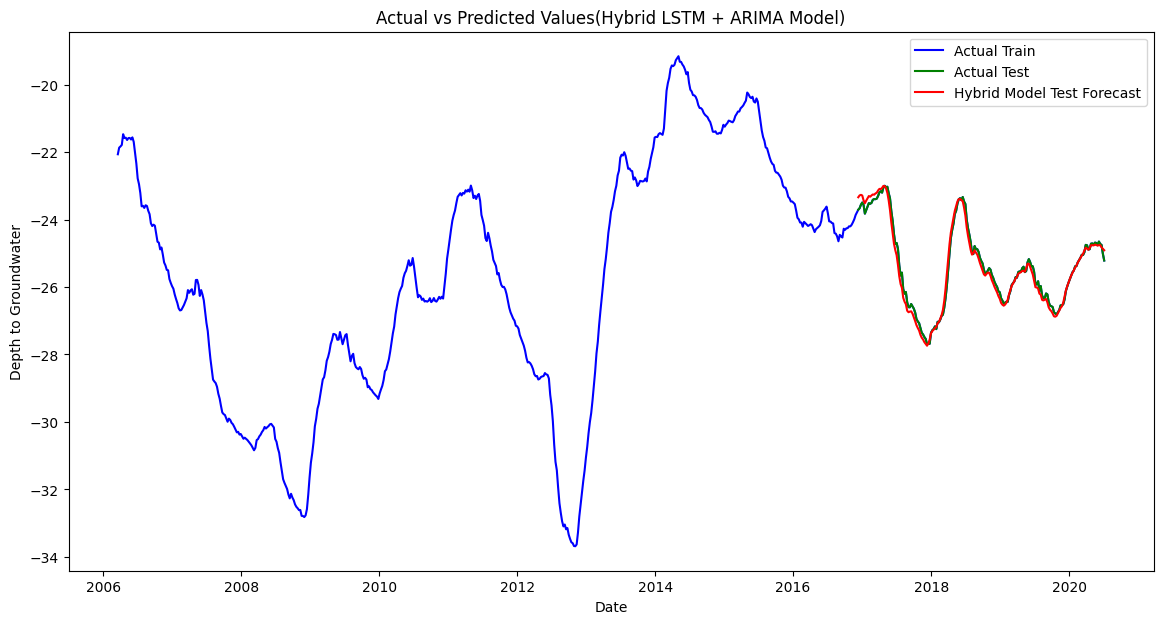

In [55]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['depth_to_groundwater'], label='Actual Train', color='blue')
plt.plot(testset.index, testset, label='Actual Test', color='green')
plt.plot(testset.index, hybrid_predictions, label='Hybrid Model Test Forecast', color='red')
plt.title('Actual vs Predicted Values(Hybrid LSTM + ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Depth to Groundwater')
plt.legend()
plt.show()

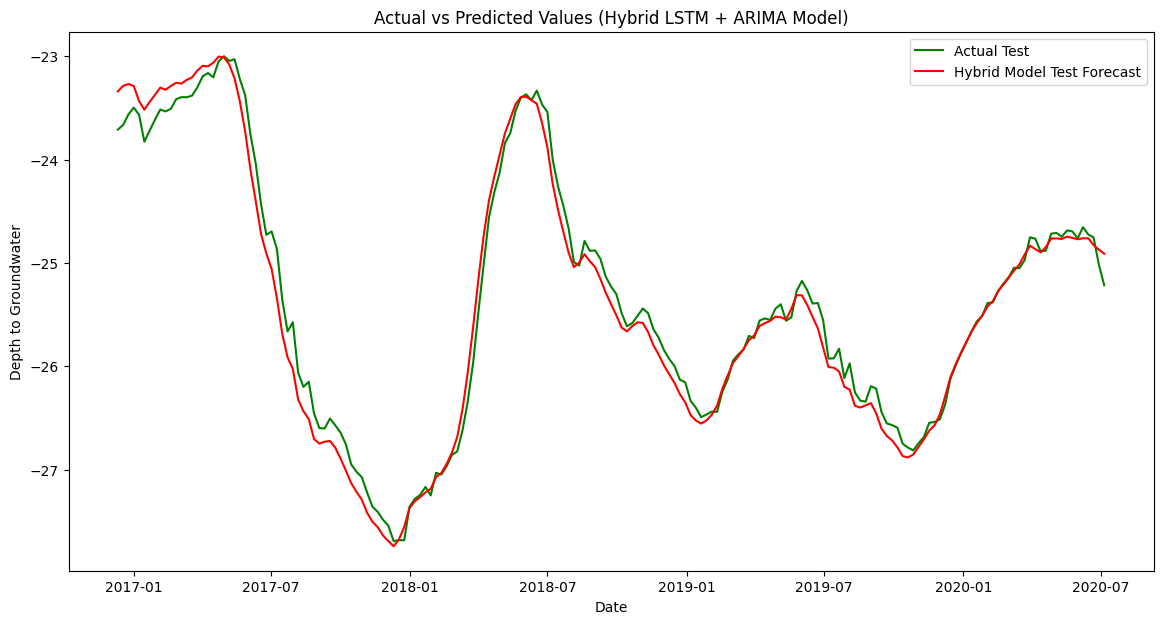

In [56]:
plt.figure(figsize=(14, 7))
plt.plot(testset.index, testset, label='Actual Test', color='green')
plt.plot(testset.index, hybrid_predictions, label='Hybrid Model Test Forecast', color='red')
plt.title('Actual vs Predicted Values (Hybrid LSTM + ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Depth to Groundwater')
plt.legend()
plt.show()